In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import json
import re
import os
import numpy as np

In [2]:
def read_jsonlines(fname):
    docs = []
    with open(fname) as fin:
        for line in fin.readlines():
            doc = json.loads(line)
            docs.append(doc)
    
    nr_sentences = [len(doc['sentences']) for doc in docs]
    nr_tokens = [len(s) for doc in docs for s in doc['sentences']]
    
    cl_att = 'predicted_clusters' if 'predicted_clusters' in docs[0].keys() else 'clusters'
    cluster_sizes = [len(c) for doc in docs for c in doc[cl_att]] 

    print('nr of docs:', len(nr_sentences))
    print('total nr of sentences: ', np.sum(nr_sentences))
    print('total nr of tokens: ', np.sum(nr_tokens))
    nr_clusters = len(cluster_sizes)
    nr_mentions = np.sum(cluster_sizes)
    nr_singletons = np.sum(np.array(cluster_sizes)==1)
    print('Nr of mentions: {} = {} singleton + {} non-singleton'.format(
        nr_mentions, nr_singletons, nr_mentions-nr_singletons))
    print('Nr of clusters: {} = {} singleton + {} non-singleton'.format(
        nr_clusters, nr_singletons, nr_clusters-nr_singletons))
    
    return docs

In [3]:
fname = 'dev-exp8.jsonlines'
docs = read_jsonlines(fname)

nr of docs: 103
total nr of sentences:  5438
total nr of tokens:  85952
Nr of mentions: 24960 = 18168 singleton + 6792 non-singleton
Nr of clusters: 20041 = 18168 singleton + 1873 non-singleton


In [4]:
cluster_sizes_gold = [len(c) for doc in docs for c in doc['clusters']]
cluster_sizes_predicted = [len(c) for doc in docs for c in doc['predicted_clusters']]

Cluster sizes


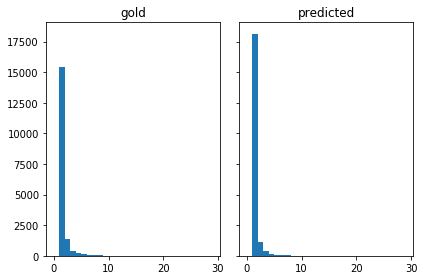

In [5]:
print('Cluster sizes')
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(cluster_sizes_gold, bins=range(30))
axs[0].set_title('gold')
axs[1].hist(cluster_sizes_predicted, bins=range(30))
axs[1].set_title('predicted')
plt.show()

## Look into one document

In [6]:
doc = docs[67]
doc['doc_key']

'WR-P-P-I-0000000069'

In [7]:
clusters_gold_nosing = [cl for cl in doc['clusters'] if len(cl)>1]
clusters_predicted_nosing = [cl for cl in doc['predicted_clusters'] if len(cl)>1]
print('Gold: {} clusters, {} non-singleton'.format(len(doc['clusters']), len(clusters_gold_nosing)))
print('Predicted: {} clusters, {} non-singleton'.format(len(doc['predicted_clusters']), len(clusters_predicted_nosing)))

Gold: 26 clusters, 4 non-singleton
Predicted: 28 clusters, 4 non-singleton


In [9]:
from IPython.display import Markdown, display

def display_color(text, color):
    return "<span style='color:{}'>{}</span>".format(color, text)

tokens = [tok for s in doc['sentences'] for tok in s]
marks_gold = [''] * (len(tokens)+1)
for i, cl in enumerate(doc['clusters']):
    for s,e in cl:
        marks_gold[s] += '[({})'.format(i)
        marks_gold[e+1] += ']'

marked_text_gold = ' '.join([m +' ' + display_color(t, 'red') for m,t in zip(marks_gold, tokens+[''])])
display(Markdown(marked_text_gold))

[(0)[(1) <span style='color:red'>Zeven</span>  <span style='color:red'>veehandelaars</span> ] <span style='color:red'>,</span>  <span style='color:red'>verdacht</span>  <span style='color:red'>van</span> [(2) <span style='color:red'>dierenmishandeling</span> ]] <span style='color:red'>,</span>  <span style='color:red'>worden</span>  <span style='color:red'>door</span> [(3) <span style='color:red'>de</span>  <span style='color:red'>correctionele</span>  <span style='color:red'>rechtbank</span>  <span style='color:red'>van</span> [(4) <span style='color:red'>Brussel</span> ]] <span style='color:red'>vrijgesproken</span>  <span style='color:red'>.</span> [(5) <span style='color:red'>Het</span>  <span style='color:red'>Brusselse</span>  <span style='color:red'>parket</span> ] <span style='color:red'>vervolgde</span> [(0) <span style='color:red'>de</span>  <span style='color:red'>veehandelaars</span> ] <span style='color:red'>nadat</span> [(0) <span style='color:red'>ze</span> ] <span style='color:red'>geïdentificeerd</span>  <span style='color:red'>werden</span>  <span style='color:red'>op</span> [(12) <span style='color:red'>beelden</span>  <span style='color:red'>die</span> [(7) <span style='color:red'>de</span>  <span style='color:red'>dierenrechtenorganisaties</span> [(6)[(8) <span style='color:red'>Gaia</span> ] <span style='color:red'>en</span> [(9) <span style='color:red'>Animaux</span>  <span style='color:red'>en</span>  <span style='color:red'>Péril</span> ]]] <span style='color:red'>stiekem</span>  <span style='color:red'>gedraaid</span>  <span style='color:red'>hadden</span>  <span style='color:red'>in</span> [(10) <span style='color:red'>november</span> [(11) <span style='color:red'>2000</span> ]] <span style='color:red'>op</span> [(13) <span style='color:red'>de</span>  <span style='color:red'>veemarkt</span>  <span style='color:red'>van</span> [(14) <span style='color:red'>Anderlecht</span> ]]] <span style='color:red'>.</span> [(12) <span style='color:red'>De</span>  <span style='color:red'>beelden</span> ] <span style='color:red'>ontlokten</span>  <span style='color:red'>toen</span> [(15) <span style='color:red'>een</span>  <span style='color:red'>storm</span>  <span style='color:red'>van</span> [(16) <span style='color:red'>protest</span> ]] <span style='color:red'>bij</span> [(17) <span style='color:red'>de</span>  <span style='color:red'>publieke</span>  <span style='color:red'>opinie</span> ] <span style='color:red'>en</span>  <span style='color:red'>zetten</span> [(5) <span style='color:red'>het</span>  <span style='color:red'>parket</span> ] <span style='color:red'>ertoe</span>  <span style='color:red'>aan</span> [(18) <span style='color:red'>een</span>  <span style='color:red'>onderzoek</span> ] <span style='color:red'>in</span>  <span style='color:red'>te</span>  <span style='color:red'>stellen</span>  <span style='color:red'>.</span> [(19) <span style='color:red'>De</span>  <span style='color:red'>rechter</span> ] <span style='color:red'>oordeelt</span>  <span style='color:red'>vandaag</span>  <span style='color:red'>dat</span> [(12) <span style='color:red'>de</span>  <span style='color:red'>beelden</span> ][(20) <span style='color:red'>een</span>  <span style='color:red'>inbreuk</span>  <span style='color:red'>vormen</span>  <span style='color:red'>op</span> [(21) <span style='color:red'>de</span>  <span style='color:red'>privacywet</span> ]] <span style='color:red'>en</span>  <span style='color:red'>daardoor</span>  <span style='color:red'>een</span>  <span style='color:red'>onrechtmatig</span>  <span style='color:red'>bewijs</span>  <span style='color:red'>zijn</span>  <span style='color:red'>.</span> [(6) <span style='color:red'>Gaia</span> ] <span style='color:red'>tekent</span> [(22) <span style='color:red'>beroep</span> ] <span style='color:red'>aan</span>  <span style='color:red'>tegen</span> [(23) <span style='color:red'>de</span>  <span style='color:red'>uitspraak</span> ] <span style='color:red'>.</span>  <span style='color:red'>(</span>  <span style='color:red'>Zie</span>  <span style='color:red'>ook</span> [(24) <span style='color:red'>pag.</span> [(25) <span style='color:red'>10</span> ]] <span style='color:red'>)</span>  <span style='color:red'></span>

In [10]:
marks_predicted = [''] * (len(tokens)+1)
for i, cl in enumerate(doc['predicted_clusters']):
    for s,e in cl:
        marks_predicted[s] += '[({})'.format(i)
        marks_predicted[e+1] += ']'

marked_text_predicted = ' '.join([m +' ' + display_color(t, 'red') for m,t in zip(marks_predicted, tokens+[''])])
display(Markdown(marked_text_predicted))

[(0)[(1) <span style='color:red'>Zeven</span>  <span style='color:red'>veehandelaars</span> ] <span style='color:red'>,</span> [(0) <span style='color:red'>verdacht</span>  <span style='color:red'>van</span> [(2) <span style='color:red'>dierenmishandeling</span> ]]] <span style='color:red'>,</span>  <span style='color:red'>worden</span>  <span style='color:red'>door</span> [(3) <span style='color:red'>de</span>  <span style='color:red'>correctionele</span>  <span style='color:red'>rechtbank</span>  <span style='color:red'>van</span> [(4) <span style='color:red'>Brussel</span> ]] <span style='color:red'>vrijgesproken</span>  <span style='color:red'>.</span> [(5) <span style='color:red'>Het</span>  <span style='color:red'>Brusselse</span>  <span style='color:red'>parket</span> ] <span style='color:red'>vervolgde</span> [(0) <span style='color:red'>de</span>  <span style='color:red'>veehandelaars</span> ] <span style='color:red'>nadat</span> [(0) <span style='color:red'>ze</span> ] <span style='color:red'>geïdentificeerd</span>  <span style='color:red'>werden</span>  <span style='color:red'>op</span> [(6) <span style='color:red'>beelden</span>  <span style='color:red'>die</span> [(7) <span style='color:red'>de</span>  <span style='color:red'>dierenrechtenorganisaties</span> [(8)[(9)[(10) <span style='color:red'>Gaia</span> ] <span style='color:red'>en</span> [(11) <span style='color:red'>Animaux</span> ]] <span style='color:red'>en</span> [(12) <span style='color:red'>Péril</span> ]]] <span style='color:red'>stiekem</span>  <span style='color:red'>gedraaid</span>  <span style='color:red'>hadden</span>  <span style='color:red'>in</span> [(13) <span style='color:red'>november</span> [(14) <span style='color:red'>2000</span> ]] <span style='color:red'>op</span> [(15) <span style='color:red'>de</span>  <span style='color:red'>veemarkt</span>  <span style='color:red'>van</span> [(16) <span style='color:red'>Anderlecht</span> ]]] <span style='color:red'>.</span> [(6) <span style='color:red'>De</span>  <span style='color:red'>beelden</span> ] <span style='color:red'>ontlokten</span>  <span style='color:red'>toen</span> [(17) <span style='color:red'>een</span>  <span style='color:red'>storm</span>  <span style='color:red'>van</span> [(18) <span style='color:red'>protest</span>  <span style='color:red'>bij</span> [(19) <span style='color:red'>de</span>  <span style='color:red'>publieke</span>  <span style='color:red'>opinie</span> ]]] <span style='color:red'>en</span>  <span style='color:red'>zetten</span> [(5) <span style='color:red'>het</span>  <span style='color:red'>parket</span> ] <span style='color:red'>ertoe</span>  <span style='color:red'>aan</span> [(20) <span style='color:red'>een</span>  <span style='color:red'>onderzoek</span> ] <span style='color:red'>in</span>  <span style='color:red'>te</span>  <span style='color:red'>stellen</span>  <span style='color:red'>.</span> [(21) <span style='color:red'>De</span>  <span style='color:red'>rechter</span> ] <span style='color:red'>oordeelt</span>  <span style='color:red'>vandaag</span>  <span style='color:red'>dat</span> [(6) <span style='color:red'>de</span>  <span style='color:red'>beelden</span> ][(22) <span style='color:red'>een</span>  <span style='color:red'>inbreuk</span>  <span style='color:red'>vormen</span>  <span style='color:red'>op</span> [(23) <span style='color:red'>de</span>  <span style='color:red'>privacywet</span> ]] <span style='color:red'>en</span>  <span style='color:red'>daardoor</span>  <span style='color:red'>een</span>  <span style='color:red'>onrechtmatig</span>  <span style='color:red'>bewijs</span>  <span style='color:red'>zijn</span>  <span style='color:red'>.</span> [(8) <span style='color:red'>Gaia</span> ] <span style='color:red'>tekent</span> [(24) <span style='color:red'>beroep</span> ] <span style='color:red'>aan</span>  <span style='color:red'>tegen</span> [(25) <span style='color:red'>de</span>  <span style='color:red'>uitspraak</span> ] <span style='color:red'>.</span>  <span style='color:red'>(</span>  <span style='color:red'>Zie</span>  <span style='color:red'>ook</span> [(26) <span style='color:red'>pag.</span> [(27) <span style='color:red'>10</span> ]] <span style='color:red'>)</span>  <span style='color:red'></span>

In [11]:
mentions_gold = set([(s,e) for cl in doc['clusters'] for s,e in cl])
mentions_predicted = set([(s,e) for cl in doc['predicted_clusters'] for s,e in cl])
print('Key mentions: {}, response mentions: {}'.format(len(mentions_gold), len(mentions_predicted)))
print('Correct identified: {}'.format(len(mentions_gold.intersection(mentions_predicted))))

Key mentions: 32, response mentions: 35
Correct identified: 29


In [12]:
print('False positives:')
for s,e in sorted(mentions_predicted.difference(mentions_gold)):
    print(' '.join(tokens[s:e+1]))

False positives:
verdacht van dierenmishandeling
Gaia en Animaux
Animaux
Péril
een storm van protest bij de publieke opinie
protest bij de publieke opinie


In [13]:
print('False negatives:')
for s,e in sorted(mentions_gold.difference(mentions_predicted)):
    print(' '.join(tokens[s:e+1]))

False negatives:
Animaux en Péril
een storm van protest
protest


In [14]:
print('Gold:')
for cl in doc['clusters']:
    if len(cl)>1:
        print(sorted([' '.join(tokens[s:e+1]) for s,e in cl]))

print('\n')
print('Predicted:')
for cl in doc['predicted_clusters']:
    if len(cl)>1:
        print(sorted(([' '.join(tokens[s:e+1]) for s,e in cl])))
        

Gold:
['Zeven veehandelaars', 'de veehandelaars', 'ze']
['Het Brusselse parket', 'het parket']
['Gaia', 'Gaia']
['De beelden', 'beelden die de dierenrechtenorganisaties Gaia en Animaux en Péril stiekem gedraaid hadden in november 2000 op de veemarkt van Anderlecht', 'de beelden']


Predicted:
['Zeven veehandelaars', 'de veehandelaars', 'verdacht van dierenmishandeling', 'ze']
['Het Brusselse parket', 'het parket']
['De beelden', 'beelden die de dierenrechtenorganisaties Gaia en Animaux en Péril stiekem gedraaid hadden in november 2000 op de veemarkt van Anderlecht', 'de beelden']
['Gaia', 'Gaia']
